# Multipal linear regression

$\hat{y} = \beta_{0} + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + .....+ \beta_{n}x_n+\epsilon$

**Y** = **X**$\beta$+**E**

Där **X** är modellspecefikations matris. **E** är vektorn med stokastiska fel med avseende på väntevärdet och **Y** är respons vektor för Y över hela stickprovet. 

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_path = "../Data/Advertising.csv"

adv = pd.read_csv(data_path, index_col= 0)

adv.head()
Y = adv["sales"].to_numpy()

X = np.column_stack([np.ones(Y.shape[0]), adv["TV"], adv["radio"]])


$\hat{\beta} = (X^TX)^{-1}X^TY$

SSE = $\frac{1}{n} \sum_{i=1}^{n} [y_i - (b_0 +b_1x_{1i}+...+b_kx_{ki})]^2$

In [122]:
b = np.linalg.pinv(X.T @ X) @ X.T @ Y

k = len(b)-1
n = Y.shape[0]

# Hela mellan vår punkt och sanna medlet
SSE = np.sum(np.square(Y -(X @ b)))
var = SSE / (n-k-1)
S = np.sqrt(var)
Syy = np.sum(np.square(Y)) - (np.square(np.sum(Y)))/n

SSR = SSE - Syy

# Residualen under linjen
# SSR är den delen av felet vi har skapat
SSR_2 = np.sum(b*(X.T @ Y)) - (np.square(np.sum(Y))/n)

# SSR, SSR_2





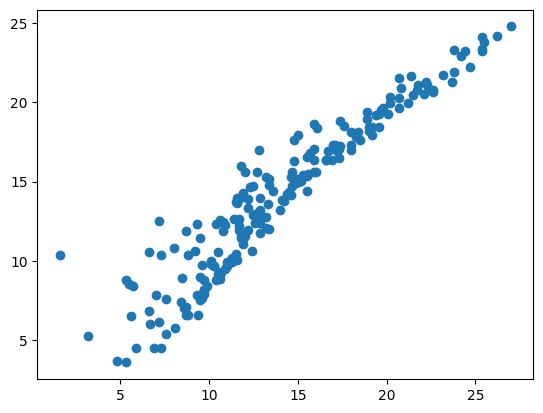

In [123]:
plt.scatter(Y, X @ b)

In [124]:
b

array([2.92109991, 0.04575482, 0.18799423])

In [125]:
# Confidence. Så vi kan välja 90% som konfidens grad. 
Rsq = SSR/Syy

Rsq

np.float64(-0.8971942610828956)

In [126]:
import scipy.stats as stats

# H0: all beta = 0
sig_statistic = (SSR/k)/S
p_significance = stats.f.sf(sig_statistic, k, n-k-1)

SSR, sig_statistic, p_significance

# We reject the null hypothesis, regression IS significant

(np.float64(-4860.234769932382),
 np.float64(-1445.327631258721),
 np.float64(1.0))

Variance/Co-variance matrix:
$c = (X^TX)^{-1}\sigma^2$

In [127]:
b

array([2.92109991, 0.04575482, 0.18799423])

In [128]:
# Check if one variabel is significant, ex Radio ads in this case.
# This depends also on if our signification levle is lower the P value. 
# If P value is higer, it is not sigificant to our signification level. 

c = np.linalg.pinv(X.T @ X) * var

# H0: b3 is irrelevant, beta3 = 0, visar hur sann noll-hypotesen
b3_statistic = b[1] / (S*np.sqrt(c[1, 1]))

p_b3 = 2*min(stats.t.cdf(b3_statistic, n-k-1), stats.t.sf(b3_statistic, n-k-1))

p_b3

# Här är slutsatsen visar på att variabeln är noll-hypotesen och då kan vi plocka bort den.
# Den har inget värde i modellen, för den är inte signifikant

np.float64(4.4038657155173346e-48)